In [18]:
#import relevant libraries and framework
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
import math
import os
import json


warnings.filterwarnings('ignore')
%matplotlib inline
# Set the style for Seaborn
sns.set(style="whitegrid")

In [4]:
#reading out the dataset
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Stage-C-Exercise/Dataset (Prep)/Final Dataset.csv')
df

,Unnamed: 0,Ranking,World Rank,University,Country,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,50,1,237,University of Cape Town,South Africa,262,246,290,237,1,1,262,246,290
1,0,2,392,University of the Witwatersrand,Zimbabwe,632,387,419,392,2,2,632,387,419
2,51,3,437,University of Pretoria,South Africa,597,506,499,437,3,3,597,506,499
3,1,4,441,Stellenbosch University,South Africa,671,350,500,441,4,4,671,350,500
4,52,5,521,Cairo University,Egypt,1589,675,253,521,4,1,1589,675,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,457,458,8949,University of Energy and Natural Resources,Kenya,12874,3094,7237,8949,260,15,12874,3094,7237
458,458,459,9008,(3) Université de Sfax Institut Supérieur de B...,Sudan,24659,8183,4694,9008,483,26,24659,8183,4694
459,459,460,9008,Kisii University,Kenya,12219,3839,7237,9008,261,25,12219,3839,7237
460,460,461,9053,École Inter Etats des Sciences et Medecine Vet...,Ghana,14815,8183,6156,9053,262,7,14815,8183,6156


#### Double checking the data


In [8]:
#check for missing value
df.isnull().any().sum()

False

#### So we have no missing value here 

In [9]:
#check for duplicates
df.duplicated().any()

False

Also, no duplicated entry. We are good to go the, but before that, just a quick one

## DESCRIPTIVE STATISTICS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           462 non-null    int64 
 1   Ranking              462 non-null    int64 
 2   World Rank           462 non-null    int64 
 3   University           462 non-null    object
 4   Country              462 non-null    object
 5   Impact Rank          462 non-null    int64 
 6   Openness Rank        462 non-null    int64 
 7   Excellence Rank      462 non-null    int64 
 8   World Ranking        462 non-null    int64 
 9   Continental Ranking  462 non-null    int64 
 10  Country Rank         462 non-null    int64 
 11  Impact               462 non-null    int64 
 12  Openness             462 non-null    int64 
 13  Excellence           462 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 50.7+ KB


#### Note: No float64 data point present

In [11]:
df.describe()

,Unnamed: 0,Ranking,World Rank,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,230.500000,231.500000,4798.430736,10352.112554,4564.733766,4123.268398,4798.430736,184.880952,20.034632,10352.112554,4564.733766,4123.268398
std,133.512172,133.512172,2195.050622,5356.834599,2517.201038,1951.924962,2195.050622,123.620619,19.756624,5356.834599,2517.201038,1951.924962
min,0.000000,1.000000,237.000000,262.000000,246.000000,253.000000,237.000000,1.000000,1.000000,262.000000,246.000000,253.000000
25%,115.250000,116.250000,3088.000000,6398.000000,2407.500000,2686.750000,3088.000000,87.250000,5.000000,6398.000000,2407.500000,2686.750000
50%,230.500000,231.500000,4775.000000,10041.500000,4033.500000,4066.000000,4775.000000,168.500000,13.000000,10041.500000,4033.500000,4066.000000
75%,345.750000,346.750000,6527.250000,13762.750000,7247.000000,5583.000000,6527.250000,250.750000,28.750000,13762.750000,7247.000000,5583.000000
max,461.000000,462.000000,9062.000000,29940.000000,8183.000000,7237.000000,9062.000000,484.000000,85.000000,29940.000000,8183.000000,7237.000000


In [12]:
df.head()

,Unnamed: 0,Ranking,World Rank,University,Country,Impact Rank,Openness Rank,Excellence Rank,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,50,1,237,University of Cape Town,South Africa,262,246,290,237,1,1,262,246,290
1,0,2,392,University of the Witwatersrand,Zimbabwe,632,387,419,392,2,2,632,387,419
2,51,3,437,University of Pretoria,South Africa,597,506,499,437,3,3,597,506,499
3,1,4,441,Stellenbosch University,South Africa,671,350,500,441,4,4,671,350,500
4,52,5,521,Cairo University,Egypt,1589,675,253,521,4,1,1589,675,253


In [13]:
df.columns

Index(['Unnamed: 0', 'Ranking', 'World Rank', 'University', 'Country',
       'Impact Rank', 'Openness Rank', 'Excellence Rank', 'World Ranking',
       'Continental Ranking', 'Country Rank', 'Impact', 'Openness',
       'Excellence'],
      dtype='object')

#### What column is that Unnamed: 0. After checking the websource it was dicovered that the Unnamed: 0 is not needed or underfined, Hence we can just remove it

In [14]:
#dropping unnecessary columns
cols_to_drop = ['Unnamed: 0', 'Impact Rank',	'Openness Rank', 'Excellence Rank']
df = df.drop( cols_to_drop ,axis =1,)
df


,Ranking,World Rank,University,Country,World Ranking,Continental Ranking,Country Rank,Impact,Openness,Excellence
0,1,237,University of Cape Town,South Africa,237,1,1,262,246,290
1,2,392,University of the Witwatersrand,Zimbabwe,392,2,2,632,387,419
2,3,437,University of Pretoria,South Africa,437,3,3,597,506,499
3,4,441,Stellenbosch University,South Africa,441,4,4,671,350,500
4,5,521,Cairo University,Egypt,521,4,1,1589,675,253
...,...,...,...,...,...,...,...,...,...,...
457,458,8949,University of Energy and Natural Resources,Kenya,8949,260,15,12874,3094,7237
458,459,9008,(3) Université de Sfax Institut Supérieur de B...,Sudan,9008,483,26,24659,8183,4694
459,460,9008,Kisii University,Kenya,9008,261,25,12219,3839,7237
460,461,9053,École Inter Etats des Sciences et Medecine Vet...,Ghana,9053,262,7,14815,8183,6156


In [15]:
df.columns

Index(['Ranking', 'World Rank', 'University', 'Country', 'World Ranking',
       'Continental Ranking', 'Country Rank', 'Impact', 'Openness',
       'Excellence'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ranking              462 non-null    int64 
 1   World Rank           462 non-null    int64 
 2   University           462 non-null    object
 3   Country              462 non-null    object
 4   World Ranking        462 non-null    int64 
 5   Continental Ranking  462 non-null    int64 
 6   Country Rank         462 non-null    int64 
 7   Impact               462 non-null    int64 
 8   Openness             462 non-null    int64 
 9   Excellence           462 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 36.2+ KB


## Explorative Data Analysis and Visualization
#### This is the main purpose of this notebook, to cover major insights from this data, I will be conducting the analysis in the following phase
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis 
- Corellation Analysis 

## Univariate Analysis 

1. Histogram of 'Ranking':

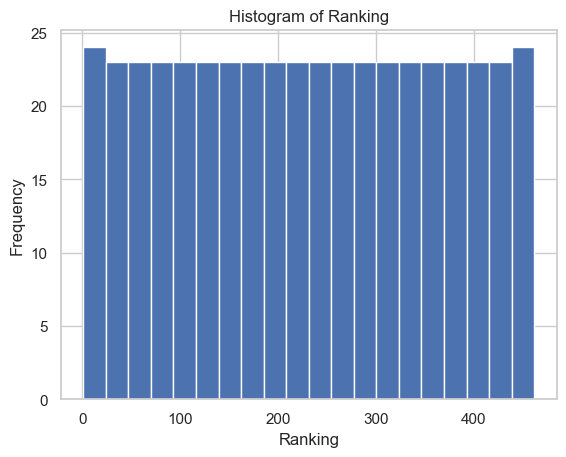

In [23]:
plt.hist(df['Ranking'], bins=20)
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.title('Histogram of Ranking')
plt.show()


2. Histogram of 'World Rank':

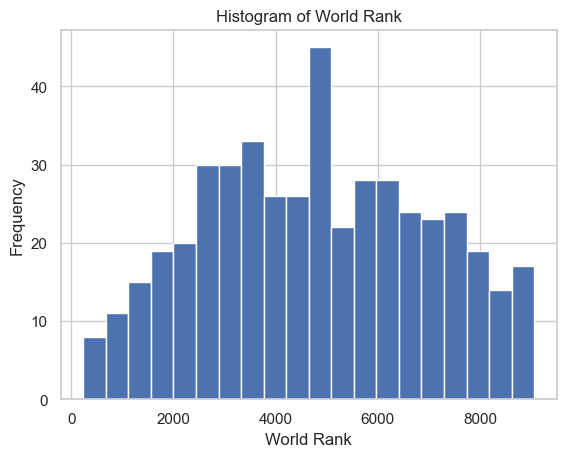

In [24]:
plt.hist(df['World Rank'], bins=20)
plt.xlabel('World Rank')
plt.ylabel('Frequency')
plt.title('Histogram of World Rank')
plt.show()

2. Bar Plot of 'Country':

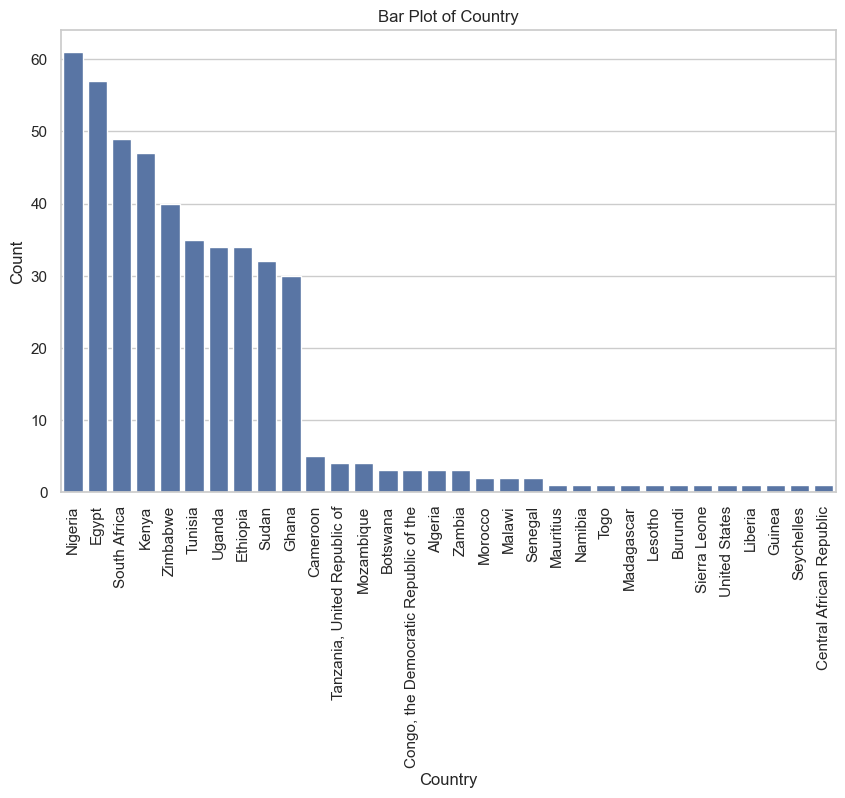

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Plot of Country')
plt.show()


3. Histogram of 'World Ranking'

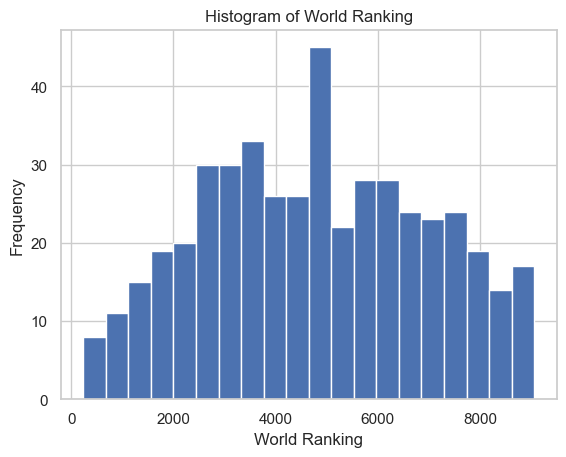

In [31]:
plt.hist(df['World Ranking'], bins=20)
plt.xlabel('World Ranking')
plt.ylabel('Frequency')
plt.title('Histogram of World Ranking')
plt.show()


5. Histogram of 'Country Rank':

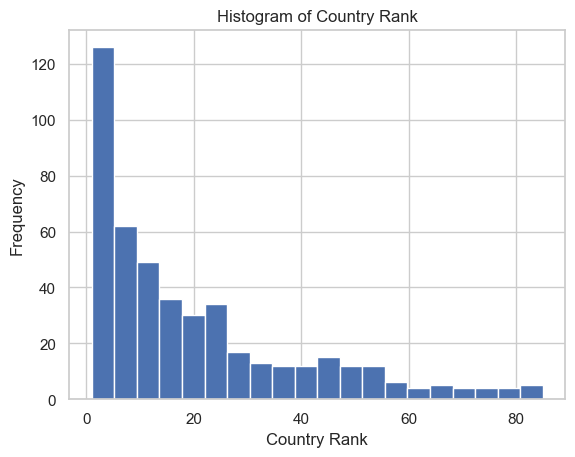

In [29]:
plt.hist(df['Country Rank'], bins=20)
plt.xlabel('Country Rank')
plt.ylabel('Frequency')
plt.title('Histogram of Country Rank')
plt.show()

6. Histogram of 'Impact':

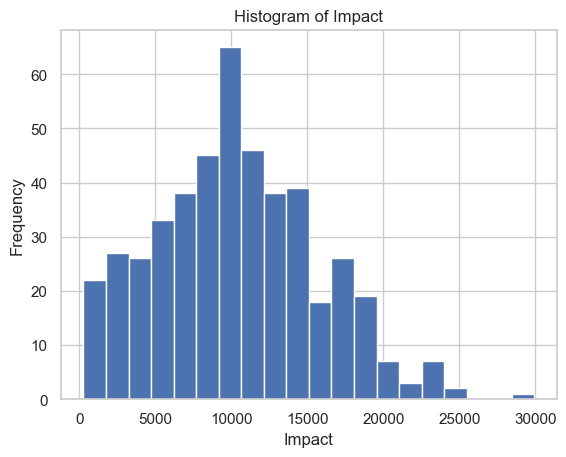

In [28]:
plt.hist(df['Impact'], bins=20)
plt.xlabel('Impact')
plt.ylabel('Frequency')
plt.title('Histogram of Impact')
plt.show()

7. Histogram of 'Openness':

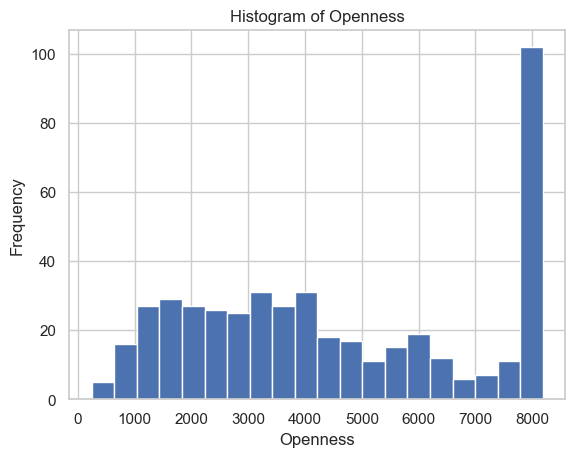

In [26]:
plt.hist(df['Openness'], bins=20)
plt.xlabel('Openness')
plt.ylabel('Frequency')
plt.title('Histogram of Openness')
plt.show()

8. Histogram of 'Excellence'

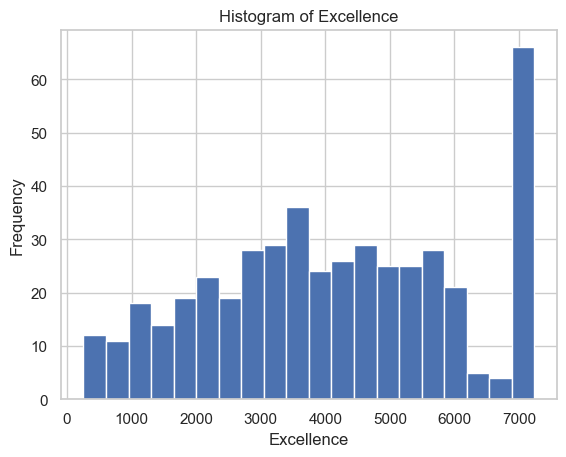

In [27]:
plt.hist(df['Excellence'], bins=20)
plt.xlabel('Excellence')
plt.ylabel('Frequency')
plt.title('Histogram of Excellence')
plt.show()

## BIVARIATE ANALYSIS

1. Scatter Plot of 'World Rank' vs. 'Impact':
This scatter plot can help you understand how the impact ranking relates to the world ranking of universities.

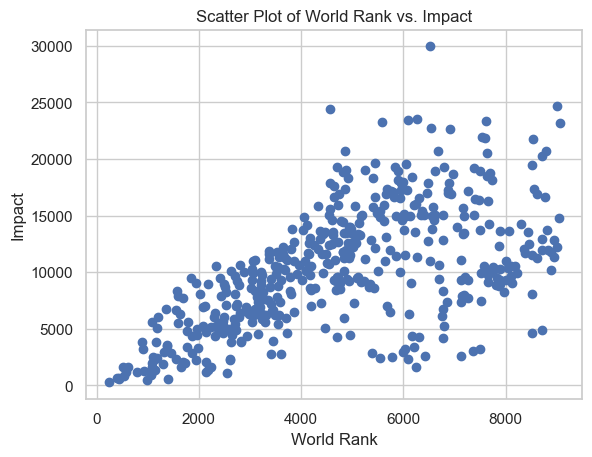

In [32]:
plt.scatter(df['World Rank'], df['Impact'])
plt.xlabel('World Rank')
plt.ylabel('Impact')
plt.title('Scatter Plot of World Rank vs. Impact')
plt.show()

2. Scatter Plot of 'World Rank' vs. 'Excellence':
Explore the relationship between world ranking and excellence ranking.

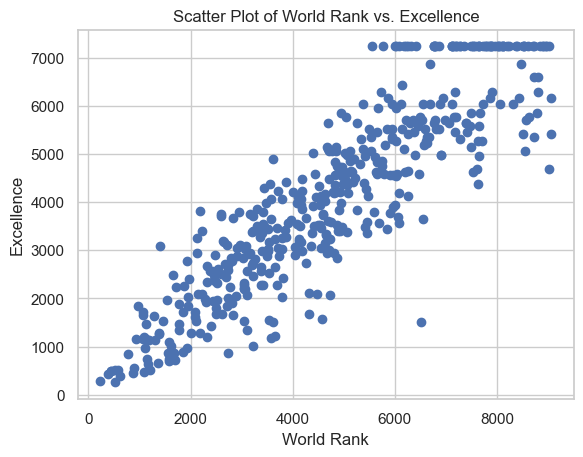

In [33]:
plt.scatter(df['World Rank'], df['Excellence'])
plt.xlabel('World Rank')
plt.ylabel('Excellence')
plt.title('Scatter Plot of World Rank vs. Excellence')
plt.show()

3. Scatter Plot of 'Impact' vs. 'Openness':
Investigate the relationship between impact and openness rankings.

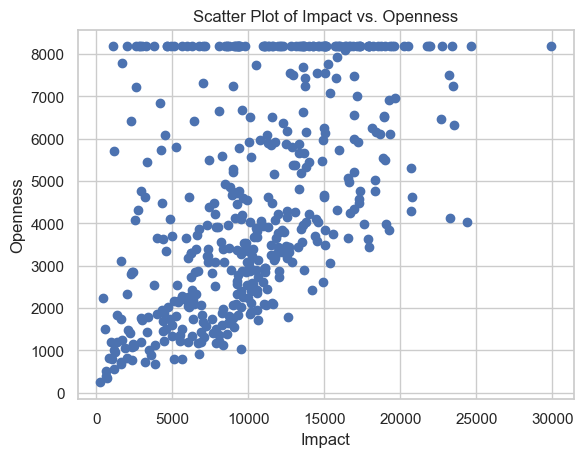

In [34]:
plt.scatter(df['Impact'], df['Openness'])
plt.xlabel('Impact')
plt.ylabel('Openness')
plt.title('Scatter Plot of Impact vs. Openness')
plt.show()

4. Box Plot of 'Country' vs. 'World Rank':
Examine how world rankings are distributed across different countries.

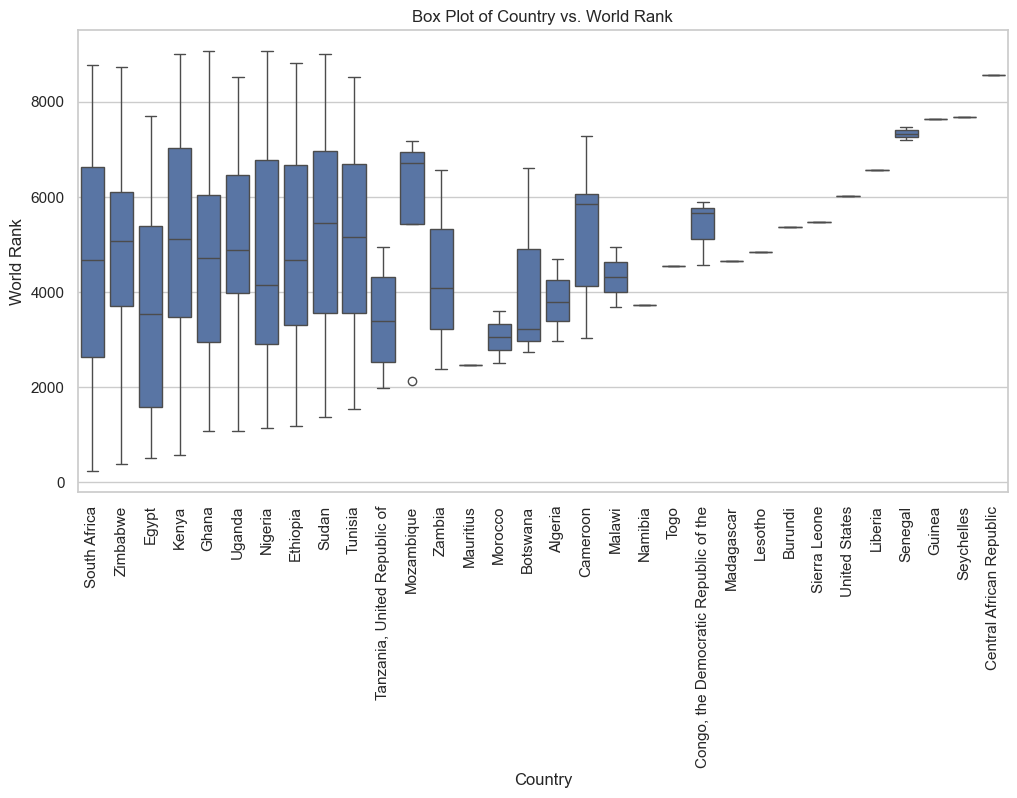

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='World Rank')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Box Plot of Country vs. World Rank')
plt.show()

5. Bar Plot of 'Country' vs. Average 'Impact':
Calculate the average impact ranking for universities in each country and plot it.

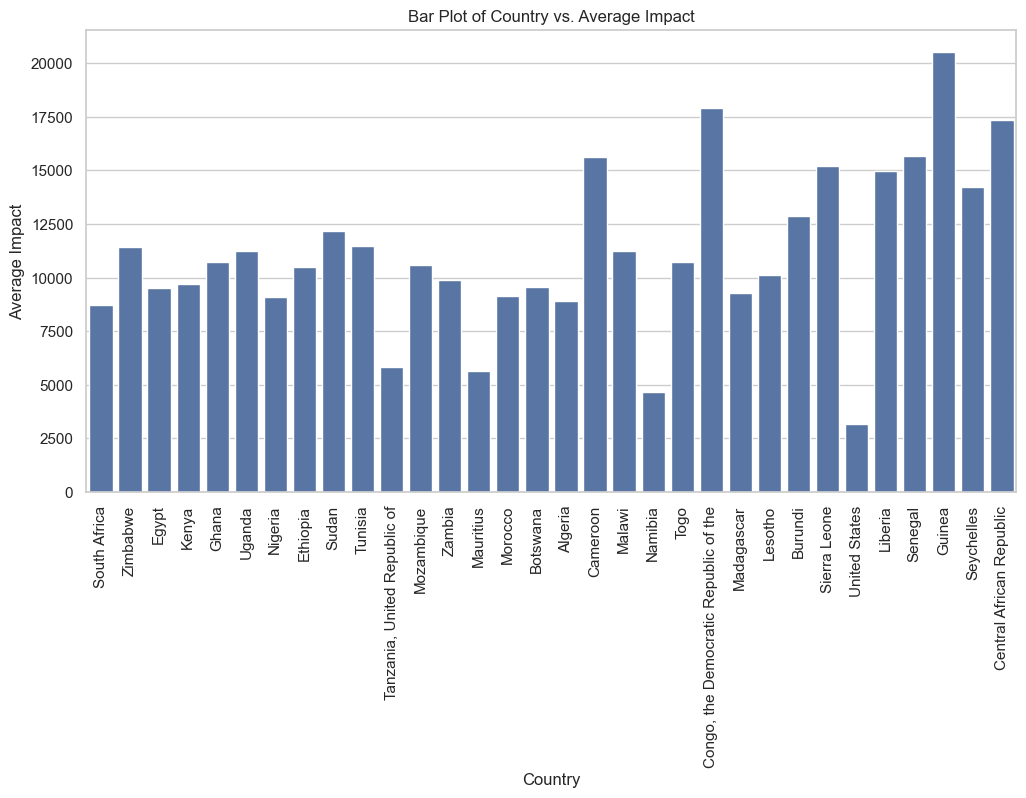

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Impact', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Impact')
plt.title('Bar Plot of Country vs. Average Impact')
plt.show()


6. Heatmap of Correlations:
Visualize the correlations between numerical features using a heatmap.

In [38]:

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'University of Cape Town'

7. Pair Plot of Numerical Features:
Create a pair plot to visualize pairwise relationships between numerical features.

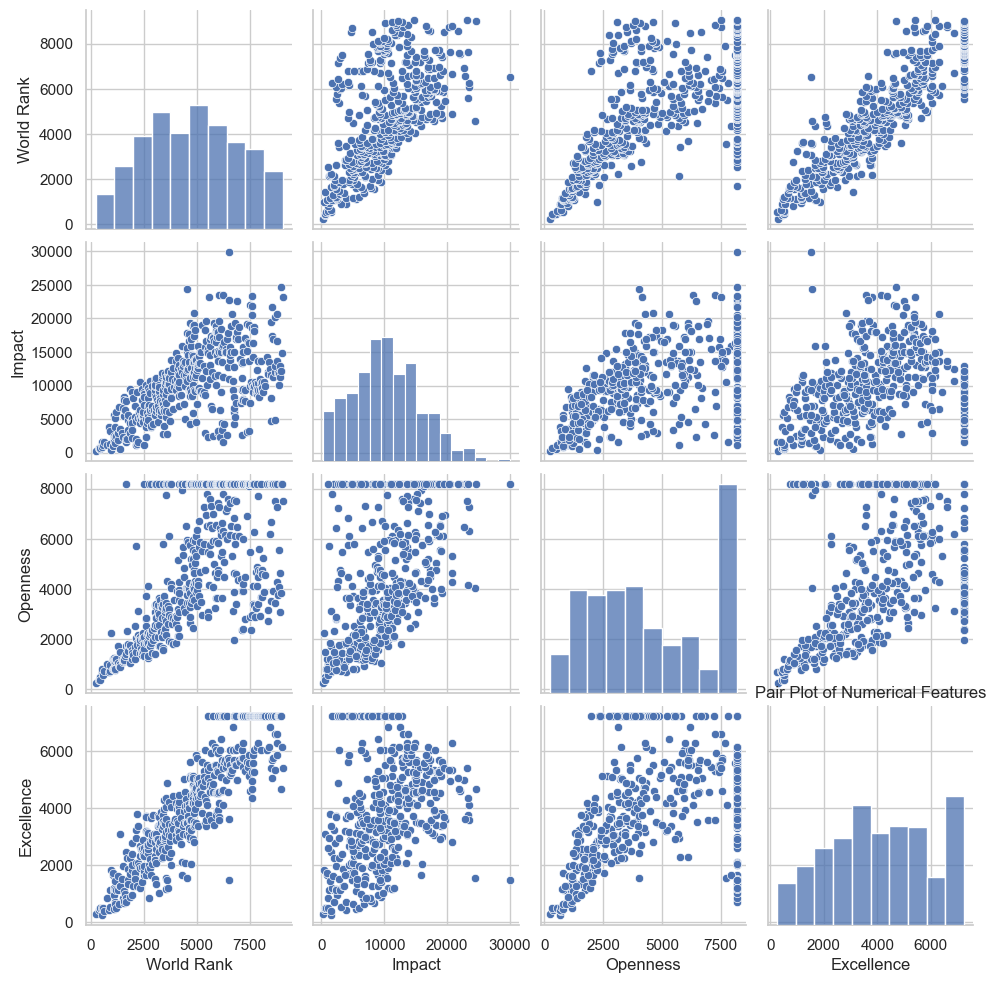

In [39]:
sns.pairplot(df[['World Rank', 'Impact', 'Openness', 'Excellence']])
plt.title('Pair Plot of Numerical Features')
plt.show()

8. Violin Plot of 'Country' vs. 'Openness':
Visualize the distribution of openness rankings across different countries using a violin plot.

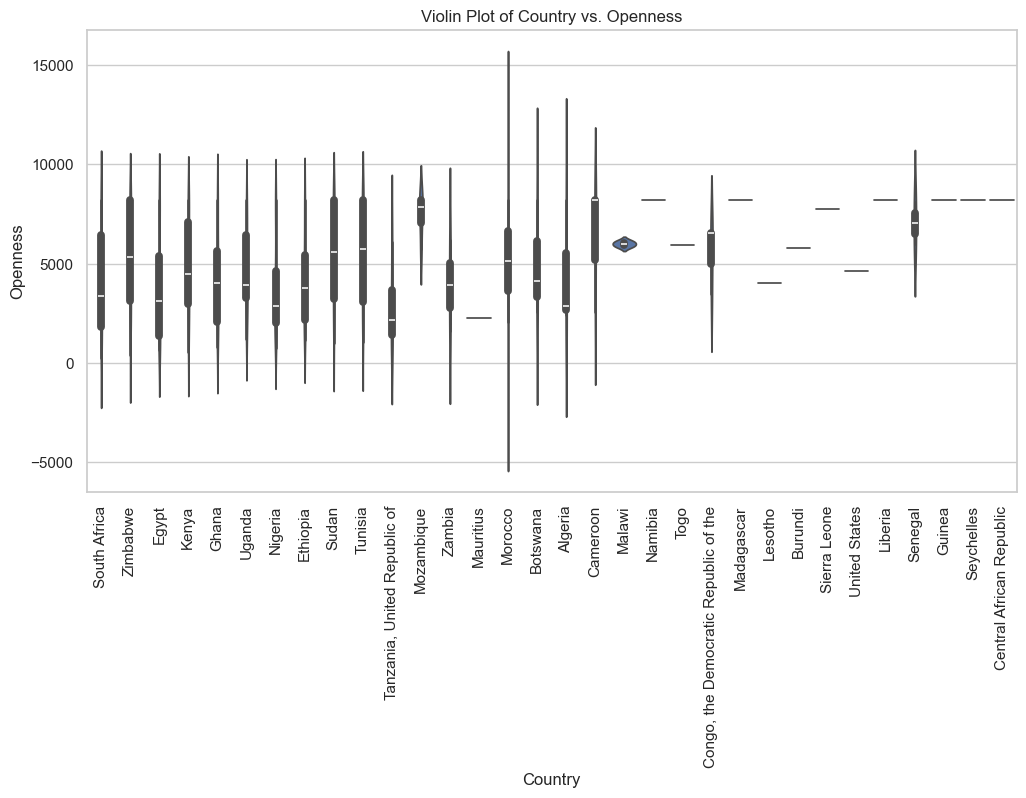

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Country', y='Openness')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Openness')
plt.title('Violin Plot of Country vs. Openness')
plt.show()


9. Stacked Bar Plot of 'Country' vs. 'Impact' and 'Openness':
Compare the impact and openness rankings of universities in each country using a stacked bar plot.

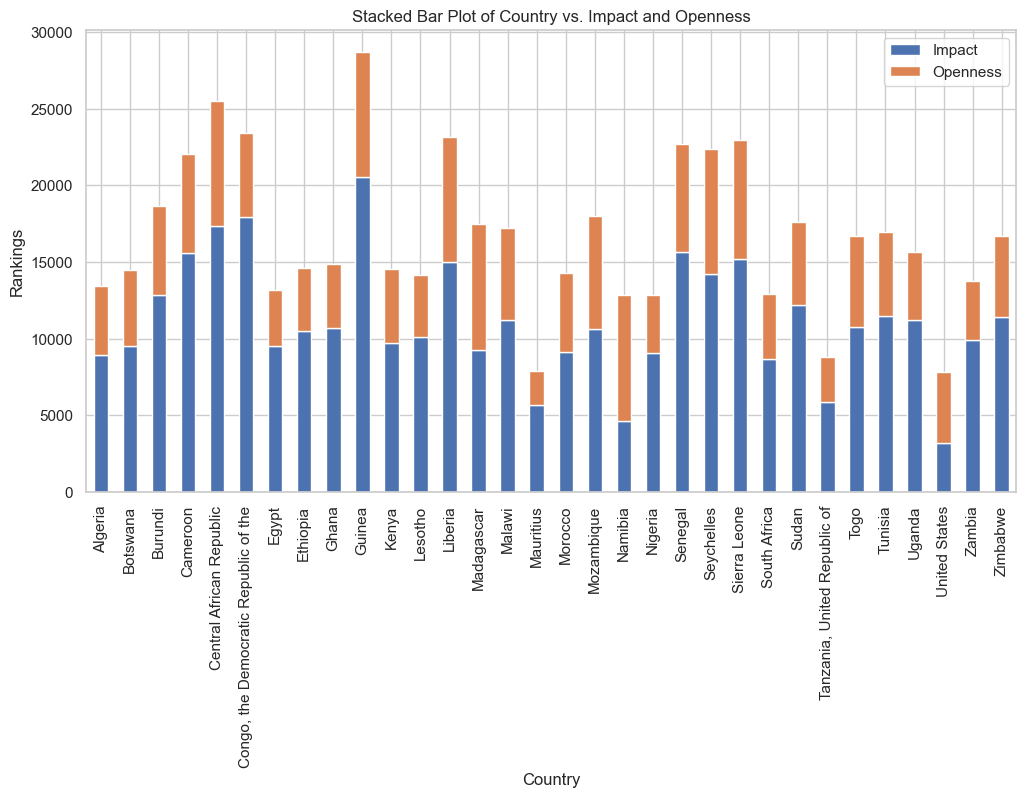

In [41]:
df_country_agg = df.groupby('Country')[['Impact', 'Openness']].mean()
df_country_agg.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Rankings')
plt.title('Stacked Bar Plot of Country vs. Impact and Openness')
plt.show()